In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

### .EDA (рассчитать описательные статистики (мю,сигма,квартили…)+ графический анализ с выводами)

In [167]:
df = pd.read_csv('data.csv')
df

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118
...,...,...,...,...,...
5674,Toms,Red & White,4,6747,5098
5675,Crocs,Black,7,2942,2868
5676,Toms,Blue,9,4847,3673
5677,Liberty,Black,6,2146,1722


In [168]:
df.head(10)

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118
5,Franco Leone,Brown,8,3942,1773
6,Crocs,White,6,2942,2243
7,Franco Leone,Black & Red,8,3146,1723
8,Crocs,Blue,10,3942,3868
9,Crocs,Brown,11,5742,5668


## price

In [169]:
df['price'].describe()

count     5679.000000
mean      4945.126255
std       5344.881308
min       1346.000000
25%       2942.000000
50%       3742.000000
75%       4646.000000
max      37947.000000
Name: price, dtype: float64

In [170]:
df['price'].quantile(0.25)

np.float64(2942.0)

In [171]:
df['price'].var()

np.float64(28567756.192757204)

## offer_price

In [172]:
df['offer_price'].describe()

count     5679.000000
mean      4007.745026
std       4761.543884
min        773.000000
25%       1968.000000
50%       2868.000000
75%       4048.000000
max      34123.000000
Name: offer_price, dtype: float64

In [173]:
df['offer_price'].quantile(0.25)

np.float64(1968.0)

In [174]:
df['offer_price'].var()

np.float64(22672300.16005582)

## Графический анализ

In [175]:
df['brand'].value_counts().head(10)

brand
Crocs           1808
Franco Leone     630
Tresmode         618
Nike             236
Tory Burch       214
FILA             187
Woodland         176
LaBriza          168
Buckaroo         148
Reebok           139
Name: count, dtype: int64

In [176]:
df.groupby('brand')['price'].max().head(8)

brand
Adidas      14446
Asics       15446
Bata         3446
Buckaroo     4142
Converse     3146
Crocs        8442
FILA         4446
Footin       1946
Name: price, dtype: int64

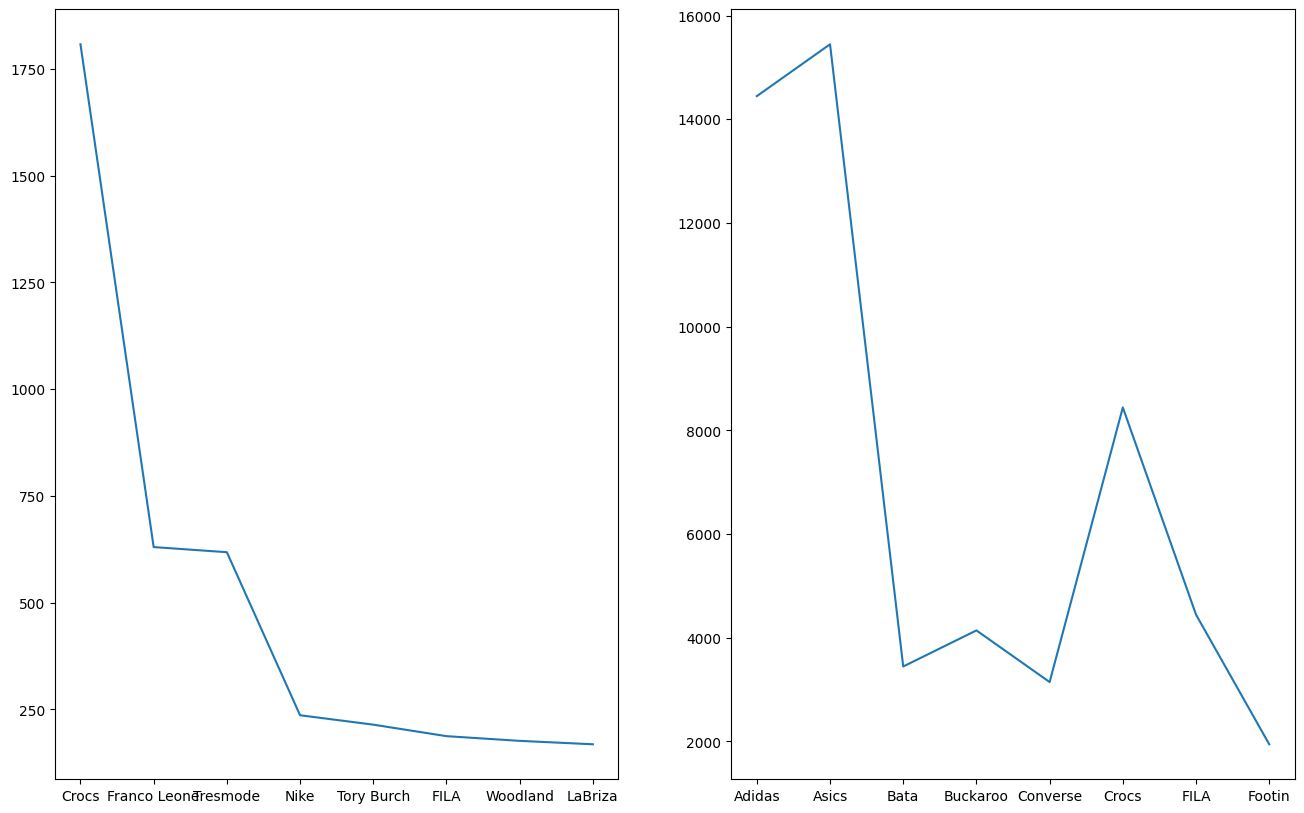

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax1, ax2 = ax.flatten()

ax1.plot(df['brand'].value_counts().head(8))
ax2.plot(df.groupby('brand')['price'].max().head(8).index, df.groupby('brand')['price'].max().head(8))

fig.set_size_inches(16, 10)
plt.show()

### Тестирование гипотезы (условия применимости того или иного критерия проверить , можно с графиками+ провести тестирование, оформить вывод)

In [178]:
df.iloc[:, 3:]

,price,offer_price
0,4647,4153
1,2446,1172
2,2346,1898
3,5942,5868
4,2942,2118
...,...,...
5674,6747,5098
5675,2942,2868
5676,4847,3673
5677,2146,1722


In [179]:
sp.stats.shapiro(df.price)

/Users/macbook/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5679.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.4432693228354847), pvalue=np.float64(1.2175312733555872e-85))

In [180]:
stats, p = sp.stats.shapiro(df.price)
p

np.float64(1.2175312733555872e-85)

По тесту Шапиро-Уилка на нормальное распрделение мы видим, что p-value > 0.05 и сделаем вывод, что распределение price - не нормальное

In [181]:
stats, p = sp.stats.shapiro(df.offer_price)
p

np.float64(3.7458032660521725e-85)

По тесту Шапиро-Уилка на нормальное распрделение мы видим, что p-value > 0.05 и сделаем вывод, что распределение offer_price - не нормальное

Далее мы используем непараметрический тест Манна-Уитни, из за того что у нас два ненормальных распределения

In [182]:
sp.stats.mannwhitneyu(df.offer_price, df.price, alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(11084816.0), pvalue=np.float64(4.894552288965137e-183))

In [183]:
stats, p = sp.stats.mannwhitneyu(df.price, df.offer_price)
p

np.float64(4.894552288965137e-183)

У нас p < 0.05 следдовательно наши средние двух ген совокупностей не равны

## Линейная регрессия (условия применимости метода проверить ,можно с графиками, построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)

In [184]:
prices = df[['price', 'offer_price']].sort_values(by='price') 
prices.drop_duplicates(inplace=True)
prices

,price,offer_price
4231,1346,1272
1044,1442,1368
3018,1446,1372
2948,1446,773
1052,1446,1072
...,...,...
4922,31697,28498
4001,32947,29623
1922,34197,30748
5141,35447,31873


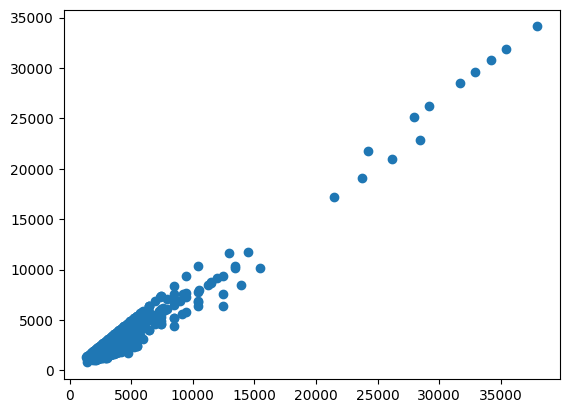

In [185]:
plt.scatter(prices.price, prices.offer_price)
plt.show()

Найдем нашу модель матричным методом

In [186]:
Y = prices.offer_price.values.reshape(523, 1)
Y

array([[ 1272],
       [ 1368],
       [ 1372],
       [  773],
       [ 1072],
       [ 1468],
       [ 1472],
       [ 1668],
       [ 1472],
       [ 1672],
       [ 1413],
       [ 1493],
       [ 1772],
       [ 1823],
       [ 1868],
       [  973],
       [ 1872],
       [ 1642],
       [ 1873],
       [ 1923],
       [ 1933],
       [ 1333],
       [ 1013],
       [ 1722],
       [ 1972],
       [ 1973],
       [ 1053],
       [ 1388],
       [ 1393],
       [ 1722],
       [ 2072],
       [ 1478],
       [ 1812],
       [ 2073],
       [ 2168],
       [ 1453],
       [ 1448],
       [ 1093],
       [ 1272],
       [ 1092],
       [ 1892],
       [ 1543],
       [ 1388],
       [ 2172],
       [ 1508],
       [ 1133],
       [ 1513],
       [ 1322],
       [ 1898],
       [ 1982],
       [ 2272],
       [ 1443],
       [ 1513],
       [ 2363],
       [ 1848],
       [ 2368],
       [ 1568],
       [ 1968],
       [ 1173],
       [ 1868],
       [ 1768],
       [ 2013],
       [

In [187]:
X = prices.price.values.reshape(523, 1)
X

array([[ 1346],
       [ 1442],
       [ 1446],
       [ 1446],
       [ 1446],
       [ 1542],
       [ 1546],
       [ 1742],
       [ 1746],
       [ 1746],
       [ 1746],
       [ 1842],
       [ 1846],
       [ 1897],
       [ 1942],
       [ 1942],
       [ 1946],
       [ 1946],
       [ 1947],
       [ 1997],
       [ 2007],
       [ 2042],
       [ 2042],
       [ 2046],
       [ 2046],
       [ 2047],
       [ 2142],
       [ 2142],
       [ 2142],
       [ 2146],
       [ 2146],
       [ 2146],
       [ 2146],
       [ 2147],
       [ 2242],
       [ 2242],
       [ 2242],
       [ 2242],
       [ 2246],
       [ 2246],
       [ 2246],
       [ 2246],
       [ 2246],
       [ 2246],
       [ 2342],
       [ 2342],
       [ 2342],
       [ 2346],
       [ 2346],
       [ 2346],
       [ 2346],
       [ 2346],
       [ 2347],
       [ 2437],
       [ 2442],
       [ 2442],
       [ 2442],
       [ 2442],
       [ 2442],
       [ 2442],
       [ 2442],
       [ 2446],
       [

In [188]:
ones_matrix = np.ones((523, 1))
ones_matrix

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [189]:
concat_matrix = np.hstack((ones_matrix, X))
concat_matrix

array([[1.0000e+00, 1.3460e+03],
       [1.0000e+00, 1.4420e+03],
       [1.0000e+00, 1.4460e+03],
       ...,
       [1.0000e+00, 3.4197e+04],
       [1.0000e+00, 3.5447e+04],
       [1.0000e+00, 3.7947e+04]])

In [190]:
B0, B1 = np.dot(np.linalg.inv(np.dot(concat_matrix.T, concat_matrix)), concat_matrix.T @ Y)
B0, B1

(array([-523.77422628]), array([0.8664489]))

Получаем нашу модель Y_pred = -523.77422628 + 0.8664489 * X

Теперь исследуем модель на статистическую значимость

H0: B0 = 0, B1 = 0;

H1: B0 != 0, B1 != 0

граница p-value = 0.05

In [191]:
p = 2 # параметры
n = 523

In [192]:
df1 = p - 1
df1

1

In [193]:
df2 = n - p
df2

521

In [194]:
y_pred = B0 + prices.price.values * B1
y_pred

array([  642.46599548,   725.64509005,   729.11088565,   729.11088565,
         729.11088565,   812.28998022,   815.75577583,   985.57976057,
         989.04555618,   989.04555618,   989.04555618,  1072.22465075,
        1075.69044635,  1119.87934034,  1158.86954092,  1158.86954092,
        1162.33533653,  1162.33533653,  1163.20178543,  1206.52423052,
        1215.18871954,  1245.5144311 ,  1245.5144311 ,  1248.9802267 ,
        1248.9802267 ,  1249.84667561,  1332.15932127,  1332.15932127,
        1332.15932127,  1335.62511688,  1335.62511688,  1335.62511688,
        1335.62511688,  1336.49156578,  1418.80421145,  1418.80421145,
        1418.80421145,  1418.80421145,  1422.27000705,  1422.27000705,
        1422.27000705,  1422.27000705,  1422.27000705,  1422.27000705,
        1505.44910162,  1505.44910162,  1505.44910162,  1508.91489723,
        1508.91489723,  1508.91489723,  1508.91489723,  1508.91489723,
        1509.78134613,  1587.76174729,  1592.0939918 ,  1592.0939918 ,
      

In [195]:
SSf_list = (y_pred - prices.offer_price.values.mean())**2
SSf_list

array([9.52686921e+06, 9.02031299e+06, 8.99950678e+06, 8.99950678e+06,
       8.99950678e+06, 8.50736465e+06, 8.48715902e+06, 7.52651198e+06,
       7.50750752e+06, 7.50750752e+06, 7.50750752e+06, 7.05860765e+06,
       7.04020379e+06, 6.80766028e+06, 6.60571800e+06, 6.60571800e+06,
       6.58791472e+06, 6.58791472e+06, 6.58346766e+06, 6.36302870e+06,
       6.31939135e+06, 6.16784303e+06, 6.16784303e+06, 6.15064033e+06,
       6.15064033e+06, 6.14634341e+06, 5.74498273e+06, 5.74498273e+06,
       5.74498273e+06, 5.72838062e+06, 5.72838062e+06, 5.72838062e+06,
       5.72838062e+06, 5.72423385e+06, 5.33713710e+06, 5.33713710e+06,
       5.33713710e+06, 5.33713710e+06, 5.32113558e+06, 5.32113558e+06,
       5.32113558e+06, 5.32113558e+06, 5.32113558e+06, 5.32113558e+06,
       4.94430614e+06, 4.94430614e+06, 4.94430614e+06, 4.92890521e+06,
       4.92890521e+06, 4.92890521e+06, 4.92890521e+06, 4.92890521e+06,
       4.92505873e+06, 4.58502408e+06, 4.56648986e+06, 4.56648986e+06,
      

In [196]:
SSf = sum(SSf_list)
SSf

np.float64(7611922471.304783)

In [197]:
SSo_list = (prices.offer_price.values - y_pred)**2

In [198]:
SSo = sum(SSo_list)
SSo

np.float64(299435435.2650074)

In [199]:
MSf = SSf / df1
MSf

np.float64(7611922471.304783)

In [200]:
MSo = SSo / df2
MSo

np.float64(574732.1214299566)

In [201]:
Fp = MSf / MSo
Fp

np.float64(13244.296233810655)

Смотрим наше F табличное при df1 = 1 и df2 = 521

In [202]:
Ft = 3.86

Наше значение Fp гораздо дальше чем Fт 

Следовательно мы принимаем альтернативную гипотезу H1

Модель считается значимой на уровне значимости 0.05

Коэффициент корреляции

In [203]:
np.corrcoef(prices.offer_price.values, prices.price.values)

array([[1.        , 0.98089306],
       [0.98089306, 1.        ]])

Коэффициент детерминации

In [204]:
R_2 = 0.98089306**2
R_2

0.9621511951561635

Примерно 96% нашей зависимой величины Y описала наша математическая модель

## Однофакторный или двухфакторный дисперсионный анализ (обязательно условия применимости исследовать, провести анализ, оформить вывод)

In [205]:
df

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118
...,...,...,...,...,...
5674,Toms,Red & White,4,6747,5098
5675,Crocs,Black,7,2942,2868
5676,Toms,Blue,9,4847,3673
5677,Liberty,Black,6,2146,1722


Проведем однофакторный дисперсионный анализ: влияние фактора фирма на стоимость обуви

In [211]:
df[['brand', 'price']]

,brand,price
0,Tresmode,4647
1,Lavie,2446
2,FILA,2346
3,Crocs,5942
4,Crocs,2942
...,...,...
5674,Toms,6747
5675,Crocs,2942
5676,Toms,4847
5677,Liberty,2146


In [215]:
df.brand.unique()

array(['Tresmode', 'Lavie', 'FILA', 'Crocs', 'Franco Leone', 'LaBriza',
       'Hush Puppies', 'Woodland', 'Adidas', 'Buckaroo', 'Liberty',
       'Bata', 'Hidesign', 'Havaianas', 'Asics', 'Reebok', 'Vanilla Moon',
       'Nike', 'Converse', 'Tory Burch', 'Imperial India Company',
       'Umbro', 'Footin', 'PUMA', 'Toms', 'Numero Uno', 'Lee Cooper',
       'Toni Rossi', 'Sting', 'Power'], dtype=object)

In [218]:
n = df.brand.unique().size
n

30

Одним из условий дисперсионного анализа является проверка на нормальность каждого уровня нашего фактора

Возьмем все тот же тест Шапиро-Уилка, но при границе p-value 0.01

In [235]:
bad_list = {}
for i in range(n):
    brand = df.brand.unique()[i]
    list = df.loc[(df['brand'] == brand)].price.values
    st, p_value = sp.stats.shapiro(list)
    if p_value < 0.01:
        bad_list[brand] = p_value
    else:
        print(brand, p_value)

Havaianas 0.03394714529975733
Asics 0.04983285426012462
Power 0.040303213536579674


Как видим у нас три нормально распределенных уровня. Возьмем их в one way ANOVA

In [238]:
list_Havaianas = df.loc[(df['brand'] == 'Havaianas')].price.values
list_Asics = df.loc[(df['brand'] == 'Asics')].price.values
list_Power = df.loc[(df['brand'] == 'Power')].price.values

In [242]:
list_Havaianas = df.loc[(df['brand'] == 'Havaianas')].price.values
list_Havaianas

array([1947, 1947, 1897, 2047, 1897, 1997, 1997, 1997, 2147, 2047, 2047,
       1997, 1997, 1947, 1947, 2147, 2047, 2007, 2047, 2047, 1947, 1897,
       2047, 1897, 2047])

In [243]:
list_Asics = df.loc[(df['brand'] == 'Asics')].price.values
list_Asics

array([13946, 13946,  9446, 10446, 12446, 12446,  9446,  9146, 10446,
       10446, 10446, 10446,  9446,  8446, 10446,  9446,  7446,  5446,
        8446, 12446,  8446,  9446, 12446,  6946, 15446,  6946, 13946,
        7446, 10446, 12446, 15446,  6946,  9446, 10446,  6946,  9446,
        7446,  8446, 15446])

In [244]:
list_Power = df.loc[(df['brand'] == 'Power')].price.values
list_Power

array([2446, 2446, 3446, 2446, 2346, 2246, 2646, 2346, 2346, 3446, 3446,
       1846, 2946, 2946, 2946, 2446, 2246, 2746, 3446])

In [240]:
stats, p_value = sp.stats.f_oneway(list_Havaianas, list_Asics, list_Power)
p_value

np.float64(6.808216760847942e-32)

Как видим у нас очень сильно ушло от 0.05, следовательно принимаем альтернативную гипотезу

Делаем вывод: различие между группами статистически значимо, следовательно, фирма оказывает статистически значимое различие на стоимость обуви